In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
print("Shape:",df.shape)
print("\n Columns:",df.columns)
data.info()

NameError: name 'df' is not defined

In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
data = data.drop('Extracurricular Activities', axis=1)

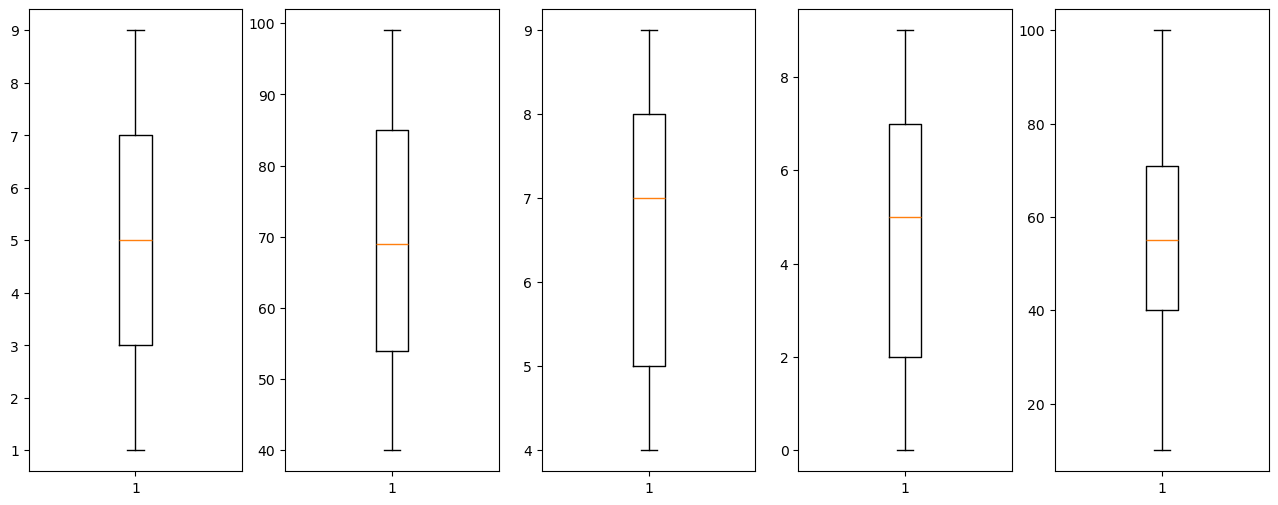

In [9]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(data['Hours Studied'] )
axs[1].boxplot(data['Previous Scores'])
axs[2].boxplot(data['Sleep Hours'] )
axs[3].boxplot(data['Sample Question Papers Practiced'])
axs[4].boxplot(data['Performance Index'])
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


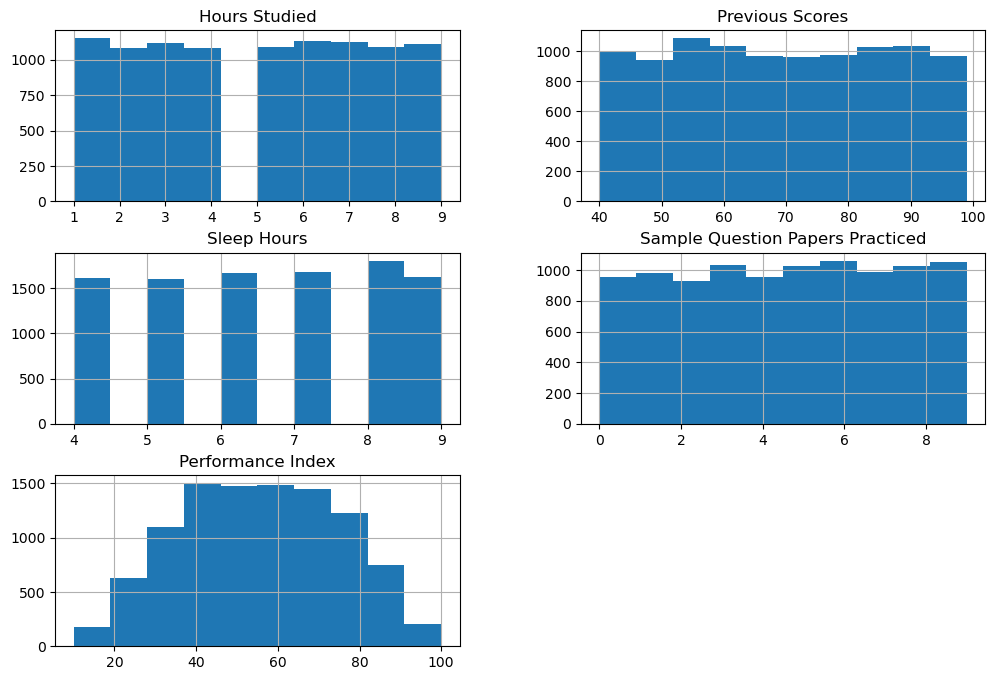

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(12,8))
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data["Hours Studied"]=scaler.fit_transform(data[["Hours Studied"]])
data["Previous Scores"]=scaler.fit_transform(data[["Previous Scores"]])
data["Sleep Hours"]=scaler.fit_transform(data[["Sleep Hours"]])
data["Sample Question Papers Practiced"]=scaler.fit_transform(data[["Sample Question Papers Practiced"]])
data["Performance Index"]=scaler.fit_transform(data[["Performance Index"]])
x=data[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]]
y=data["Performance Index"]

In [13]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.456205,-1.249754
1,-0.383481,0.723913,-1.492294,-0.900982
2,1.161410,-1.063626,0.276805,-0.900982
3,0.002742,-1.005963,-0.902594,-0.900982
4,0.775188,0.320275,0.866505,0.145333


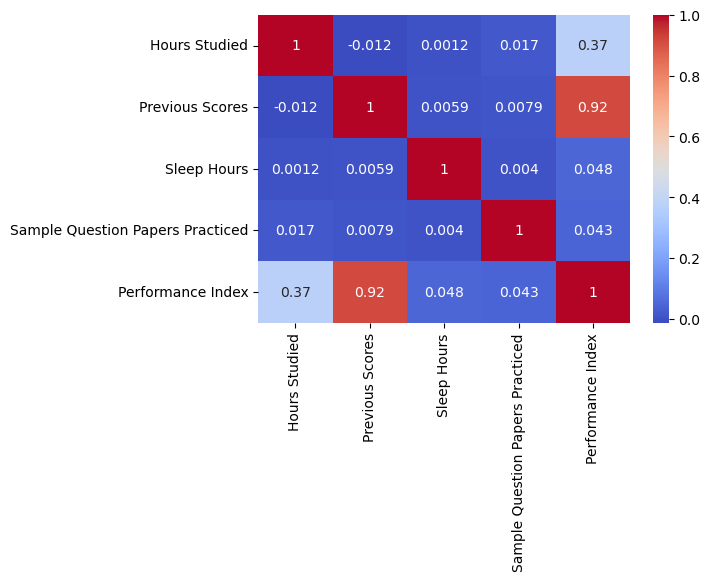

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

In [15]:
X=data[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]]
Y=data["Performance Index"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9887144552384186
MSE: 0.011331399666597762


In [18]:
from sklearn.preprocessing import PolynomialFeatures
polynomial=PolynomialFeatures(degree=2)
poly_features=polynomial.fit_transform(X_train)
model=LinearRegression()
model.fit(poly_features,y_train)

LinearRegression()

In [19]:
model.coef_,model.intercept_

(array([ 0.00000000e+00,  3.84498486e-01,  9.18100820e-01,  4.17923804e-02,
         2.85794577e-02,  8.09088320e-04,  2.45977219e-04,  7.11751596e-04,
         1.34091873e-05, -1.47063295e-03,  5.10036082e-04, -6.74449513e-04,
         1.49763437e-03,  1.47209234e-03, -3.41763114e-04]),
 0.00032784940244403975)

In [21]:
test_features=polynomial.fit_transform(X_test)
pred=model.predict(test_features)

In [22]:
mean_squared_error(y_test,pred)

0.011315370507991649

In [23]:
r2_score(y_test,pred)

0.9887304195316448

In [ ]:
from sklearn.svm import SVC,SVR
